# Platform callibration

## Find the disks speed

In [80]:
!sudo-g5k

!hostname

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

You already have sudo permissions.
grimoire-8.nancy.grid5000.fr


In [67]:
def init_disk(dev):
    !sudo umount /mnt || true

    !sudo mkfs.ext4 -F "{dev}"
    !sudo mount "{dev}" /mnt
    !sudo chown $(whoami):user /mnt
        
def get_stats():
    dd_outputs = []

    for _ in range(100):
        # Execute the dd subprocess
        output = !dd if=/dev/zero of=/mnt/toto bs=128M count=1 oflag=direct
        # parse the output
        dd_outputs.append(output[-1].split(',')[-1])

    assert all([ "MB" in elem for elem in dd_outputs ]), "outputs not in MB/s"

    return dd_outputs #str(sum([ int(elem.split(" ")[1]) for elem in dd_outputs ])/len(dd_outputs)) + " MB/s"

In [68]:
# list all available SDD
PART = !lsblk --output KNAME,ROTA,TYPE|grep '0 part' |cut -f1 -d' '

DEV="/dev/" + PART[0]
init_disk(DEV)
sdd_stats = get_stats()

mke2fs 1.43.4 (31-Jan-2017)
/dev/sdf1 contains a ext4 file system
	last mounted on /mnt on Thu May  3 17:26:33 2018
Discarding device blocks:     4096/4883999 1052672/4883999 1576960/4883999 2101248/4883999 3149824/4883999 3674112/4883999 5771264/4883999 7868416/4883999 9965568/488399912062720/488399914159872/488399916257024/488399918878464/488399920975616/488399923072768/488399924645632/488399926742784/488399928839936/488399931461376/488399933558528/488399935655680/488399937752832/488399939849984/488399941947136/488399944568576/488399946665728/488399948762880/4883999                done                            
Creating filesystem with 48839990 4k blocks and 12214272 inodes
Filesystem UUID: 2e7caa06-650c-4a65-8686-0f48d8551620
Superblock backups stored on blocks: 
	32768, 98304, 163840, 229376, 294912, 819200, 884736, 1605632, 2654208, 
	4096000, 7962624, 11239424, 20480000, 23887872

Allocating group tables:    0/149        done                            
Writing inode tables:   

In [75]:
PART = !lsblk --output KNAME,ROTA,TYPE,SIZE|grep '1 part 558'|head -n1|cut -f1 -d ' '
print("get disk part: " + PART[0])

DEV="/dev/" + PART[0]
init_disk(DEV)
hdd_stats = get_stats()

get disk part: sdc1
mke2fs 1.43.4 (31-Jan-2017)
/dev/sdc1 contains a ext4 file system
	last mounted on /mnt on Thu May  3 17:21:24 2018
Creating filesystem with 146515445 4k blocks and 36634624 inodes
Filesystem UUID: 882017a9-2638-41c6-987f-169f3b1336dd
Superblock backups stored on blocks: 
	32768, 98304, 163840, 229376, 294912, 819200, 884736, 1605632, 2654208, 
	4096000, 7962624, 11239424, 20480000, 23887872, 71663616, 78675968, 
	102400000

Allocating group tables:    0/447        done                            
Writing inode tables:    0/447        done                            
Creating journal (262144 blocks): done
Writing superblocks and filesystem accounting information:    0/447        done



mean bandwith ssd: 288.0 MB/s
mean bandwith hdd: 149.68 MB/s


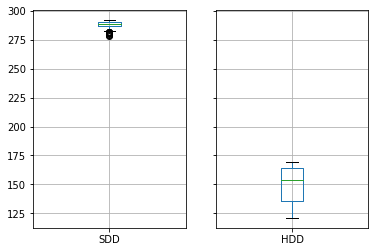

In [109]:
fig,ax=plt.subplots(ncols=2, sharey=True)

serie_ssd = pd.Series([ int(elem.split(" ")[1]) for elem in sdd_stats ])
serie_hdd = pd.Series([ int(elem.split(" ")[1]) for elem in hdd_stats ])

serie_ssd.plot(kind="box", ax=ax[0], label = "SDD")
serie_hdd.plot(kind="box", ax=ax[1], label = "HDD")

# Set grid for subplots
[ a.grid() for a in ax ]

# mean ssd
print("mean bandwith ssd: {} MB/s".format(serie_ssd.mean()))
print("mean bandwith hdd: {} MB/s".format(serie_hdd.mean()))